<center><h1> Gaussian discriminant analysis </h1></center>
# 1. Basic
The **multivariate normal(MVN)** is the most common joint distribution for multiple dimension continous variables. The pdf for an **MVN** in D dimensions is defined by the following
$$
\mathcal{N}(\vec{x}|\vec{\mu},\Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu})^T \Sigma^{-1}(\vec{x}-\vec{\mu})\right]
$$
where  $\vec{\mu}$ is the mean vector, $\Sigma$ is a symmetric, positive semidefinite matrix.

We can gain a better understanding of the **MVN** by performing an **eigendecomposition** of $\Sigma$. We write $\Sigma=U \Lambda U^T$ where $\Lambda$ is a diagonal matrix of eigenvalues of $\Sigma$. Then we can write
$$
\Sigma^{-1}=U^{-T} \Lambda^{-1} U^{-1}=U \Sigma^{-1} U^T
$$
So the exponential part of **MVN**'s pdf is writen as 
\begin{align*}
(\vec{x}-\vec{\mu})^T \Sigma^{-1}(\vec{x}-\vec{\mu}) &=
(\vec{x}-\vec{\mu})^T U \Sigma^{-1} U^T (\vec{x}-\vec{\mu}) \\
&=\vec{y}^T \Sigma^{-1} \vec{y} \\
&=\sum_{i=1}^D \frac{y_i^2}{\lambda_i}
\end{align*}

We define $\vec{y}=U^T (\vec{x}-\vec{\mu})$ above. So we can see that after some linear transformation, the density of **MVN** lie along ellipses in D-dimensions space.

If we have N iid samples $\vec{x_i} \sim N(\vec{\mu},\Sigma)$, the MLE for the parameters is given by 
\begin{align*}
\hat{\vec{\mu}}_{mle}&=\frac{1}{N} \sum_{i=1}^N \vec{x}_i=\bar{\vec{x}} \\
\hat{\Sigma}_{mle}&=\frac{1}{N} \sum_{i=1}^N (\vec{x}_i-\bar{\vec{x}})(\vec{x}_i-\bar{\vec{x}})^T
\end{align*}
# 2. Gaussian dicriminant analysis
We have discuss the generative classifier for the discrete features in [previous chapter](https://github.com/thu-xd/Notes_on_ML/blob/master/04-Naive_Bayes/Naive%20Bayes.ipynb). For real valued features, **MVN** is suitable to define the class conditional densities.
$$
p(\vec{x}|y=c,\theta)=N(\vec{x}|\vec{\mu}_c,\Sigma_c)
$$
If the covariance $\Sigma_c$ is diagonal, this is a Gaussian Naive Bayes classifier. The non diagonal case is what we care about.The $\vec{\mu}_c$ is called the center of each class c. So the **MAP** estimation for a new sample $\vec{x}$ is
$$
\hat{y}(\vec{x})=\underset{c}{argmax}[p(y=c)p(\vec{x}|y=c,\theta)]
$$
This is equally to find the **nearest centroids classifier**, because the **MVN**'s pdf is based on distance from the centroid.
## 2.1 Quadratic discriminant analysis(QDA)
The posterior over class labels is given below
\begin{align*}
p(y=c|\vec{x},\theta) &= \frac{p(y=c)p(\vec{x}|y=c,\theta)}{\sum_{c'}p(y=c')p(\vec{x}|y=c',\theta)} \\
&=\frac{p(y=c)|\Sigma_c|^{-1/2}exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu}_c)^T \Sigma_c^{-1}(\vec{x}-\vec{\mu}_c)\right]}{\sum_{c'}p(y=c')|\Sigma_c'|^{-1/2}exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu}_{c'})^T \Sigma_{c'}^{-1}(\vec{x}-\vec{\mu}_{c'})\right]}  \\
&=\frac{p(y=c)|\Sigma_c|^{-1/2}}{\sum_{c'}p(y=c')|\Sigma_c'|^{-1/2}exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu}_{c'})^T \Sigma_{c'}^{-1}(\vec{x}-\vec{\mu}_{c'})+\frac{1}{2}(\vec{x}-\vec{\mu}_{c})^T \Sigma_{c}^{-1}(\vec{x}-\vec{\mu}_{c})\right]} 
\end{align*}
The boundray between any two class $c_1$ and $c_2$ is a quadratic surface, which is the $ QDA$ meaning for.
## 2.2 Linear discriminant analysis(LDA)
The special case of $QDA$ is that the covariance of every class is the same, meaning that $\Sigma_c=\Sigma$.
\begin{align*}
p(y=c|\vec{x},\theta) &=\frac{p(y=c)|\Sigma|^{-1/2}exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu}_c)^T \Sigma^{-1}(\vec{x}-\vec{\mu}_c)\right]}{\sum_{c'}p(y=c')|\Sigma|^{-1/2}exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu}_{c'})^T \Sigma^{-1}(\vec{x}-\vec{\mu}_{c'})\right]}  \\
&=\frac{p(y=c)exp\left[\vec{\mu}_c^T\Sigma^{-1}\vec{x}-\frac{1}{2}\vec{\mu}_c^T\Sigma^{-1}\vec{\mu}_c\right]}{\sum_{c'} p(y=c')exp\left[\vec{\mu}_{c'}^T\Sigma^{-1}\vec{x}-\frac{1}{2}\vec{\mu}_{c'}^T\Sigma^{-1}\vec{\mu}_c\right]} \\
&=\frac{exp\left(\vec{\beta}_c^T \vec{x}+\gamma_c\right)}{\sum_{c'} exp\left(\vec{\beta}_{c'}^T \vec{x}+\gamma_{c'}\right)}
\end{align*}
We have defined that 
\begin{align*}
\vec{\beta}_c &=\Sigma^{-1}\vec{\mu}_c \\
\gamma_c&=-\frac{1}{2}\vec{\mu}_{c'}^T\Sigma^{-1}\vec{\mu}_c+log\,p(y=c)
\end{align*}
This is amazing. It's just the same as the softmax function. The boundray between any two class $c_1$ and $c_2$ is a hyper plane in D-dimension space.

In [1]:
import numpy as np
def dataset_fixed_cov():
    '''Generate 2 Gaussian samples with the same covariance matrix'''
    n,dim=500,2
    np.random.seed(42)
    Cov=np.array([[0.,-0.23],[0.83,.23]])
    X=np.r_[np.dot(np.random.randn(n,dim),Cov),np.dot(np.random.randn(n,dim),Cov)+np.array([1,1])]
    y=np.hstack((np.zeros(n),np.ones(n)))
    data=np.c_[X,y]
    np.random.shuffle(data)
    X=data[:,0:2]
    y=data[:,2]
    return X,y

X,y=dataset_fixed_cov()
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
LDA=LinearDiscriminantAnalysis(solver="svd",store_covariance=True)
y_pred_LDA=LDA.fit(X_train,y_train).predict(X_test)
QDA=QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred_QDA=QDA.fit(X_train,y_train).predict(X_test)
Bayes=GaussianNB()
y_pred_Bayes=Bayes.fit(X_train,y_train).predict(X_test)

from sklearn.metrics import f1_score
f1_LDA=f1_score(y_test,y_pred_LDA,average='macro')
f1_QDA=f1_score(y_test,y_pred_QDA,average='macro')
f1_Bayes=f1_score(y_test,y_pred_Bayes,average='macro')
print("The accuracy of LDA,QDA and Gaussian Naive Bayes for Generated 2 Gaussian samples with the same covariance matrix is " 
      "LDA:%2f, QDA:%2f, Bayes:%2f"%(f1_LDA,f1_QDA,f1_Bayes))

The accuracy of LDA,QDA and Gaussian Naive Bayes for Generated 2 Gaussian samples with the same covariance matrix is LDA:0.949920, QDA:0.949920, Bayes:0.934920


The result shows that for data whose class conditional distribution is multivariate Gausssian and$\Sigma_k=\Sigma$. QDA and LDA are the same and both have high accuracy. The accuracy of Gaussian Naive Bayes is lower because the inputs are not class conditional independent.

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
LDA_plot=plt.subplot(2,2,1)
X_0,X_1=X[y==0],X[y==1]
LDA_plot.plot(X_0[:,0],X_0[:,1],'o',color='g')  # plot 0 samples.
LDA_plot.plot(X_1[:,0],X_1[:,1],'o',color='b')  # plot 1 samples.
LDA_plot.set_xlim([-4,4])
LDA_plot.set_ylim([-2,2])
false_pred=(y_test!=y_pred_LDA)  # false prediction by LDA
X_false_pred=X_test[false_pred]
LDA_plot.plot(X_false_pred[:,0],X_false_pred[:,1],'*',color='r',markersize=10)
LDA_plot.set_title("LDA")
LDA_plot.legend(["0 samples","1 samples","false prediction samples"])

QDA_plot=plt.subplot(2,2,2)
X_0,X_1=X[y==0],X[y==1]
QDA_plot.plot(X_0[:,0],X_0[:,1],'o',color='g')  # plot 0 samples.
QDA_plot.plot(X_1[:,0],X_1[:,1],'o',color='b')  # plot 1 samples.
QDA_plot.set_xlim([-4,4])
QDA_plot.set_ylim([-2,2])
false_pred=(y_test!=y_pred_QDA)  # false prediction by LDA
X_false_pred=X_test[false_pred]
QDA_plot.plot(X_false_pred[:,0],X_false_pred[:,1],'*',color='r',markersize=10)
QDA_plot.set_title("QDA")
QDA_plot.legend(["0 samples","1 samples","false prediction samples"])

Bayes_plot=plt.subplot(2,2,3)
X_0,X_1=X[y==0],X[y==1]
Bayes_plot.plot(X_0[:,0],X_0[:,1],'o',color='g')  # plot 0 samples.
Bayes_plot.plot(X_1[:,0],X_1[:,1],'o',color='b')  # plot 1 samples.
Bayes_plot.set_xlim([-4,4])
Bayes_plot.set_ylim([-2,2])
false_pred=(y_test!=y_pred_Bayes)  # false prediction by LDA
X_false_pred=X_test[false_pred]
Bayes_plot.plot(X_false_pred[:,0],X_false_pred[:,1],'*',color='r',markersize=10)
Bayes_plot.set_title("Bayes")
Bayes_plot.legend(["0 samples","1 samples","false prediction samples"])
plt.show()

<Figure size 1200x1200 with 3 Axes>

We can see that the false prediction samples are all near the boundray of the two classes. The Naive Bayes models make more false predictions than the LDA and QDA, because the assumption of the Naive Bayes is stronger.

In [3]:
import numpy as np
def dataset_diff_cov():
    '''Generate 2 Gaussian samples with different covariance matrix'''
    n,dim=500,2
    np.random.seed(42)
    Cov=np.array([[0.,-0.23],[0.83,.23]])
    X=np.r_[np.dot(np.random.randn(n,dim),Cov),np.dot(np.random.randn(n,dim),Cov.T)+np.array([1,1])]
    y=np.hstack((np.zeros(n),np.ones(n)))
    data=np.c_[X,y]
    np.random.shuffle(data)
    X=data[:,0:2]
    y=data[:,2]
    return X,y

X,y=dataset_diff_cov()
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
LDA=LinearDiscriminantAnalysis(solver="svd",store_covariance=True)
y_pred_LDA=LDA.fit(X_train,y_train).predict(X_test)
QDA=QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred_QDA=QDA.fit(X_train,y_train).predict(X_test)
Bayes=GaussianNB()
y_pred_Bayes=Bayes.fit(X_train,y_train).predict(X_test)

from sklearn.metrics import f1_score
f1_LDA=f1_score(y_test,y_pred_LDA,average='macro')
f1_QDA=f1_score(y_test,y_pred_QDA,average='macro')
f1_Bayes=f1_score(y_test,y_pred_Bayes,average='macro')
print("The accuracy of LDA,QDA and Gaussian Naive Bayes for Generated 2 Gaussian samples with diffenrent covariance matrix is " 
      "LDA:%2f, QDA:%2f, Bayes:%2f"%(f1_LDA,f1_QDA,f1_Bayes))

The accuracy of LDA,QDA and Gaussian Naive Bayes for Generated 2 Gaussian samples with diffenrent covariance matrix is LDA:0.844996, QDA:0.904979, Bayes:0.874972


The result showed that for dataset whose class conditional distribution was multivariate Gaussian and with different $\Sigma_k$ for different k, the accuracy of QDA was better than the LDA and Naive Bayes, because it made little assumption about the inputs.

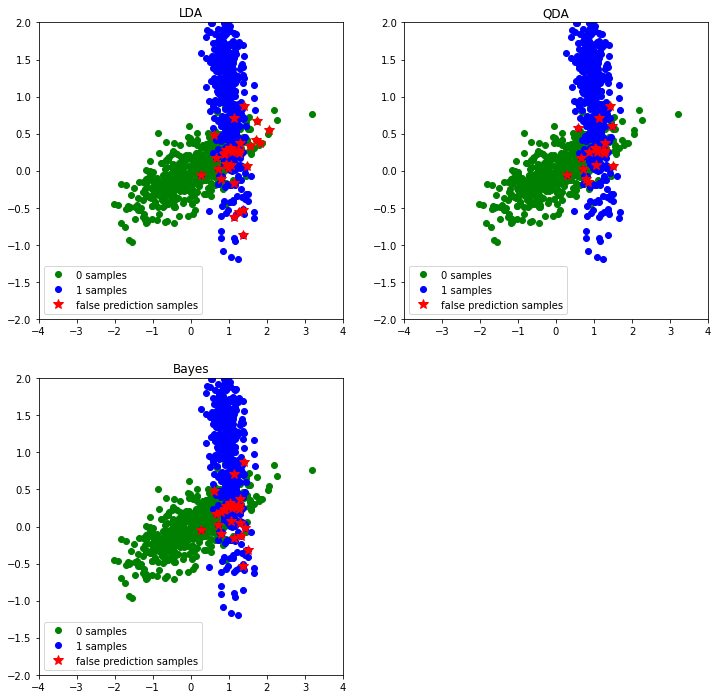

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
LDA_plot=plt.subplot(2,2,1)
X_0,X_1=X[y==0],X[y==1]
LDA_plot.plot(X_0[:,0],X_0[:,1],'o',color='g')  # plot 0 samples.
LDA_plot.plot(X_1[:,0],X_1[:,1],'o',color='b')  # plot 1 samples.
LDA_plot.set_xlim([-4,4])
LDA_plot.set_ylim([-2,2])
false_pred=(y_test!=y_pred_LDA)  # false prediction by LDA
X_false_pred=X_test[false_pred]
LDA_plot.plot(X_false_pred[:,0],X_false_pred[:,1],'*',color='r',markersize=10)
LDA_plot.set_title("LDA")
LDA_plot.legend(["0 samples","1 samples","false prediction samples"])

QDA_plot=plt.subplot(2,2,2)
X_0,X_1=X[y==0],X[y==1]
QDA_plot.plot(X_0[:,0],X_0[:,1],'o',color='g')  # plot 0 samples.
QDA_plot.plot(X_1[:,0],X_1[:,1],'o',color='b')  # plot 1 samples.
QDA_plot.set_xlim([-4,4])
QDA_plot.set_ylim([-2,2])
false_pred=(y_test!=y_pred_QDA)  # false prediction by LDA
X_false_pred=X_test[false_pred]
QDA_plot.plot(X_false_pred[:,0],X_false_pred[:,1],'*',color='r',markersize=10)
QDA_plot.set_title("QDA")
QDA_plot.legend(["0 samples","1 samples","false prediction samples"])

Bayes_plot=plt.subplot(2,2,3)
X_0,X_1=X[y==0],X[y==1]
Bayes_plot.plot(X_0[:,0],X_0[:,1],'o',color='g')  # plot 0 samples.
Bayes_plot.plot(X_1[:,0],X_1[:,1],'o',color='b')  # plot 1 samples.
Bayes_plot.set_xlim([-4,4])
Bayes_plot.set_ylim([-2,2])
false_pred=(y_test!=y_pred_Bayes)  # false prediction by LDA
X_false_pred=X_test[false_pred]
Bayes_plot.plot(X_false_pred[:,0],X_false_pred[:,1],'*',color='r',markersize=10)
Bayes_plot.set_title("Bayes")
Bayes_plot.legend(["0 samples","1 samples","false prediction samples"])

# 3. MLE for discriminant analysis
The simple way to estimate the parameters in the $QDA$ or $LDA$ is using $MLE$. The log likelihood function is as following
\begin{align*}
logp(D|\theta) & =\sum_{i=1}^N log [\pi_{yi} \mathcal{N}(\vec{x}_i|\vec{\mu}_{yi},\Sigma_{yi}]\\
&=\sum_{i=1}^N log[\pi_{yi}]+ \sum_{i=1}^N log[\mathcal{N}(\vec{x}_i|\vec{\mu}_{yi},\Sigma_{yi}]
\end{align*}

So we can get the estimate on $\pi_c$ , $\vec{\mu}_c$ and $\Sigma_c$ easily.But the **MLE** estimation can badly overfit in high dimensions because we are estimate a full covariance matrix. The solutions are as following
* Naive Bayes. we force the covariance matrix to be diagonal.
* LDA. we force the covariance matrix is the same over different classes.
* MAP estimation. Fit a full or diagonal covariance matrix by MAP estimation.
* Dimension reduction. Using dimension reduction method to project the data into a low dimensional subspace.

# 4.MAP estimation
The **MLE** estimation can lead to overfit in high dimensions. We shall develop a Bayesian treatment by inrtoducing prior distributions over the unknown parameters. For iid samples $\vec{x}_i \sim \mathcal{N}(\vec{x}|\vec{\mu},\Sigma)$. We shall firstly condisder the simple case when the $\vec{x}$ is just a scalar, which means $x_i \sim N(x|\mu,\sigma^2)$
## 4.1 Known $\sigma^2$
When the covariance $\sigma^2$ is known, we consider the task of inferring the mean $\mu$ from the samples. The likelihood function is given by 
\begin{align*}
p(X|\mu)&=\prod_{i=1}^N p(x_i|\mu)\\
&=\prod_{i=1}^N \frac{1}{(2\pi\sigma^2)^{1/2}}exp \left[-\frac{1}{2\sigma^2}(x_i-\mu)^2\right] \\
&=\frac{1}{(2\pi\sigma^2)^{N/2}}exp\left[-\frac{1}{2\sigma^2}\sum_{i=1}^N(x_i-\mu)^2\right]
\end{align*}

We can see that the likelihood function take the form of the Gaussian distribution, so we can use Gaussian distribution  as the prior for the $\mu$. We can choose $p(\mu)=N(\mu|\mu_0,\sigma_0^2)$, and the posterior distribution of $\mu$ will also be a Gaussian distribution.
## 4.2 Known $\mu$
When the mean $\mu$ is known, we consider the task of inferring the covariance $\sigma^2$ from the samples. The likelihood function is as following
$$
p(X|\lambda) \propto \lambda^{N/2} exp\left[-\frac{\lambda}{2}\sum_{i=1}^N(x_i-\mu)^2\right]
$$
where we have defined $\lambda=\frac{1}{\sigma^2}$ as the precision of the distribution.
We can see that the likelihood function takes the form of gamma distribution
$$
Gam(\lambda|a,b)=\frac{1}{\Gamma(a)}b^a\lambda^{a-1}exp(-b\lambda)
$$
If we use this prior distribution, we can calculate the posterior distribution of $\lambda$.
$$
p(\lambda|X) \propto \lambda^{N/2+a-1} exp\left[-(b_0+\frac{1}{2}\sum_{i=1}^N(x_i-\mu)^2)\lambda\right]
$$
Which is also a gamma distribution.
## 4.3 The $\mu$ and $\sigma^2$ are unknown
The likelihood function is as following
\begin{align*}
p(X|\mu,\lambda) &=\prod_{i=1}^N(\frac{\lambda}{2\pi})^{1/2} exp\left[ -\frac{\lambda}{2} (x_i-\mu)^2 \right] \\
& \propto \left[\lambda^{1/2}exp\left(-\frac{\lambda\mu^2}{2}\right) \right]^N exp\lbrace\lambda\mu \sum_{i=1}^N x_i-\frac{\lambda}{2}\sum_{i=1}^N x_i^2 \rbrace
\end{align*}
This is a awasome form, but we need to find a prior distribution $p(\mu,\lambda)$ that has the same functional form as above. We use the prior as following
\begin{align*}
p(\mu,\lambda) & \propto \left[\lambda^{1/2}exp\left(-\frac{\lambda\mu^2}{2}\right) \right]^\beta exp\lbrace c\lambda\mu -d\lambda \rbrace\\
&=exp\lbrace -\frac{\lambda\beta}{2}(\mu-\frac{c}{\beta})^2 \rbrace \lambda^{\frac{\beta}{2}}exp\lbrace -\left(d-\frac{c^2}{2\beta}\right) \lambda \rbrace\\
&=N(\mu|\mu_0,(\beta\lambda)^{-1})Gam(\lambda|a,b)
\end{align*}

These joint distribution of $\mu$ and $\lambda$ is called Gaussian-Gamma distribution. It's used as prior when the mean and covariance are both unknown. You should notice that the $\mu$ and $\lambda$ is not independent.
## 4.4 Multivariate case
In the case of the multivariate Gaussian distribution $N(\vec{x}|\vec{\mu},\Lambda^{-1})$ for a D-dimensional variable $\vec{x}$. The prior distribution for the mean $\vec{\mu}$ is again a Gaussian.For known mean and unknown precision matrix $\Lambda$, the prior is the **Wishart** distribution given by
\begin{align*}
\mathcal{W}(\Lambda|W,\nu) &=B(W,\nu)|\Lambda|^{(\nu-D-1)/2}exp\left(-\frac{1}{2}Tr(W^{-1}\Lambda) \right) \\
B(W,\nu) &=|W|^{-\nu/2}\left(2^{\nu D/2}\pi^{D(D-1)/4} \prod_{i=1}^D \Gamma \left(\frac{\nu+1-i}{2} \right) \right)^{-1}
\end{align*}
where $\nu \geq D $ is called the **degrees of freedom** of the distribution, $W$ is a $D \times D$ scale matrix.The **Wishart** distribution is a multivariate generalization of Gamma distribution. The mean and mode of the **Wishart** distribution is as following
\begin{align*}
mean &=\nu W  \\
mode &=(\nu-D-1) W
\end{align*}
For unknown mean $\vec{\mu}$ and unknown precision $\Lambda$, the prior is given by
\begin{equation*}
p(\vec{\mu},\Lambda|\vec{\mu}_0,\beta,W,\nu)=\mathcal{N}(\vec{\mu}|\vec{\mu}_0,(\beta\Lambda)^{-1})\mathcal{W}(\Lambda|W,\nu)
\end{equation*}
This is called the Gaussian-Wishart distribution.